# Air transportation Ocurrences
## Analysis

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
sys.path.append("../scripts")

In [16]:
from data_loader import load_data_from_csv
from common.export_csv import exportDataVersion
import pandas as pd
import numpy as np

### <font color=#43599e>Loading Data</font>

In [47]:
#Load data
df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2csv': {len(df)}")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.head(100)

# of rows 'fullData_V2csv': 47791


,OccID,Latitude,Longitude,CountryID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccTime,OccTypeID_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,Summary,InjuriesEnum_DisplayEng,AircraftTypeID_DisplayEng,AircraftMakeID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,NumberOfEngine,DamageLevelID_DisplayEng,OperationTypeID_DisplayEng
0,150172,46.284740,-63.644120,CANADA,2017-07-10,NaN,14:15:00,ACCIDENT,PRINCE EDWARD ISLAND,2017-07-10,C-IICE a privately operated Quad City Challeng...,Yes,ADVANCED ULTRALIGHT,CHALLENGER,NaN,PRIVATE,0-2250 KG (0-4960 LBS),LIGHT,2015,1,SUBSTANTIAL,PLEASURE/TRAVEL
1,150171,50.772778,-96.821389,CANADA,2017-07-10,ENGINE (i),13:55:00,INCIDENT,MANITOBA,2017-07-10,C-GWCP a Piper PA-32-300 aircraft operated by ...,No,AEROPLANE,PIPER,MHA ENTERPRISES,COMMERCIAL,0-2250 KG (0-4960 LBS),LIGHT,1968,1,MINOR,AIR TRANSPORT
2,150170,37.638169,-122.375428,UNITED STATES,2017-07-08,RISK OF COLLISION (x),06:56:00,INCIDENT,CALIFORNIA,2017-07-09,C-FKCK an Airbus 320-200 aircraft operated by ...,No,AEROPLANE,AIRBUS,AIR CANADA,COMMERCIAL,27001-272000 KG (59526-599650 LBS),MEDIUM,1991,2,NONE,AIR TRANSPORT
3,150169,48.650000,-93.500000,CANADA,2017-07-05,DIFFICULT TO CONTROL (iv),02:15:00,INCIDENT,ONTARIO,2017-07-07,C-GJVC a Fairchild SA227-DC aircraft operated ...,Yes,AEROPLANE,FAIRCHILD,BEARSKIN LAKE AIR SERVICE,COMMERCIAL,5701-27000 KG (12566-59525 LBS),MEDIUM,1996,2,NONE,AIR TRANSPORT
4,150168,66.448611,-92.464444,CANADA,2017-07-02,NaN,22:00:00,ACCIDENT,NUNAVUT,2017-07-05,C-GGSV an Aerospatiale AS 350 B-2 aircraft ope...,No,HELICOPTER,AEROSPATIALE,GREAT SLAVE HELICOPTERS,COMMERCIAL,0-2250 KG (0-4960 LBS),LIGHT,1989,1,SUBSTANTIAL,AIR TRANSPORT
5,150164,43.676667,-79.630556,CANADA,2017-06-24,EMERGENCY/PRIORITY (xi),10:30:00,INCIDENT,ONTARIO,2017-06-24,N12028 an Airbus 319-100 aircraft operated by ...,No,AEROPLANE,AIRBUS,AMERICAN AIRLINES,COMMERCIAL,27001-272000 KG (59526-599650 LBS),MEDIUM,2015,2,NONE,AIR TRANSPORT
6,150163,51.221944,-123.656389,CANADA,2017-07-09,NaN,00:00:00,ACCIDENT,BRITISH COLUMBIA,2017-07-09,C-GGCT a privately operated Cessna 182M aircra...,Yes,AEROPLANE,CESSNA,NaN,PRIVATE,0-2250 KG (0-4960 LBS),LIGHT,1969,1,SUBSTANTIAL,PLEASURE/TRAVEL
7,150162,44.879722,-63.510278,CANADA,2017-06-30,LOSS OF SEPARATION (x),00:45:00,INCIDENT,NOVA SCOTIA,2017-06-30,N910XJ a Bombardier CL-600-2D24 (CRJ 900) airc...,No,AEROPLANE,CANADAIR,ENDEAVOR AIR,COMMERCIAL,27001-272000 KG (59526-599650 LBS),MEDIUM,2007,2,NONE,AIR TRANSPORT
8,150161,51.300000,-128.816667,CANADA,2017-07-07,EMERGENCY/PRIORITY (xi),01:10:00,INCIDENT,UNKNOWN,2017-07-07,N174DZ a Boeing 767-300 aircraft operated by D...,No,AEROPLANE,BOEING,DELTA AIR LINES,COMMERCIAL,27001-272000 KG (59526-599650 LBS),HEAVY,1998,2,NONE,AIR TRANSPORT
9,150160,50.628056,-97.043333,CANADA,2017-07-02,RISK OF COLLISION (x),21:00:00,INCIDENT,MANITOBA,2017-07-03,C-FBIY a Cessna 182F aircraft operated by Skyd...,No,AEROPLANE,CESSNA,INTERLAKE AVIATION,COMMERCIAL,0-2250 KG (0-4960 LBS),LIGHT,1975,1,NONE,PLEASURE/TRAVEL


In [23]:
from analysis.map_visualization import plot_coordinates_heatmap
from analysis.frequency_visualization import plot_frequency

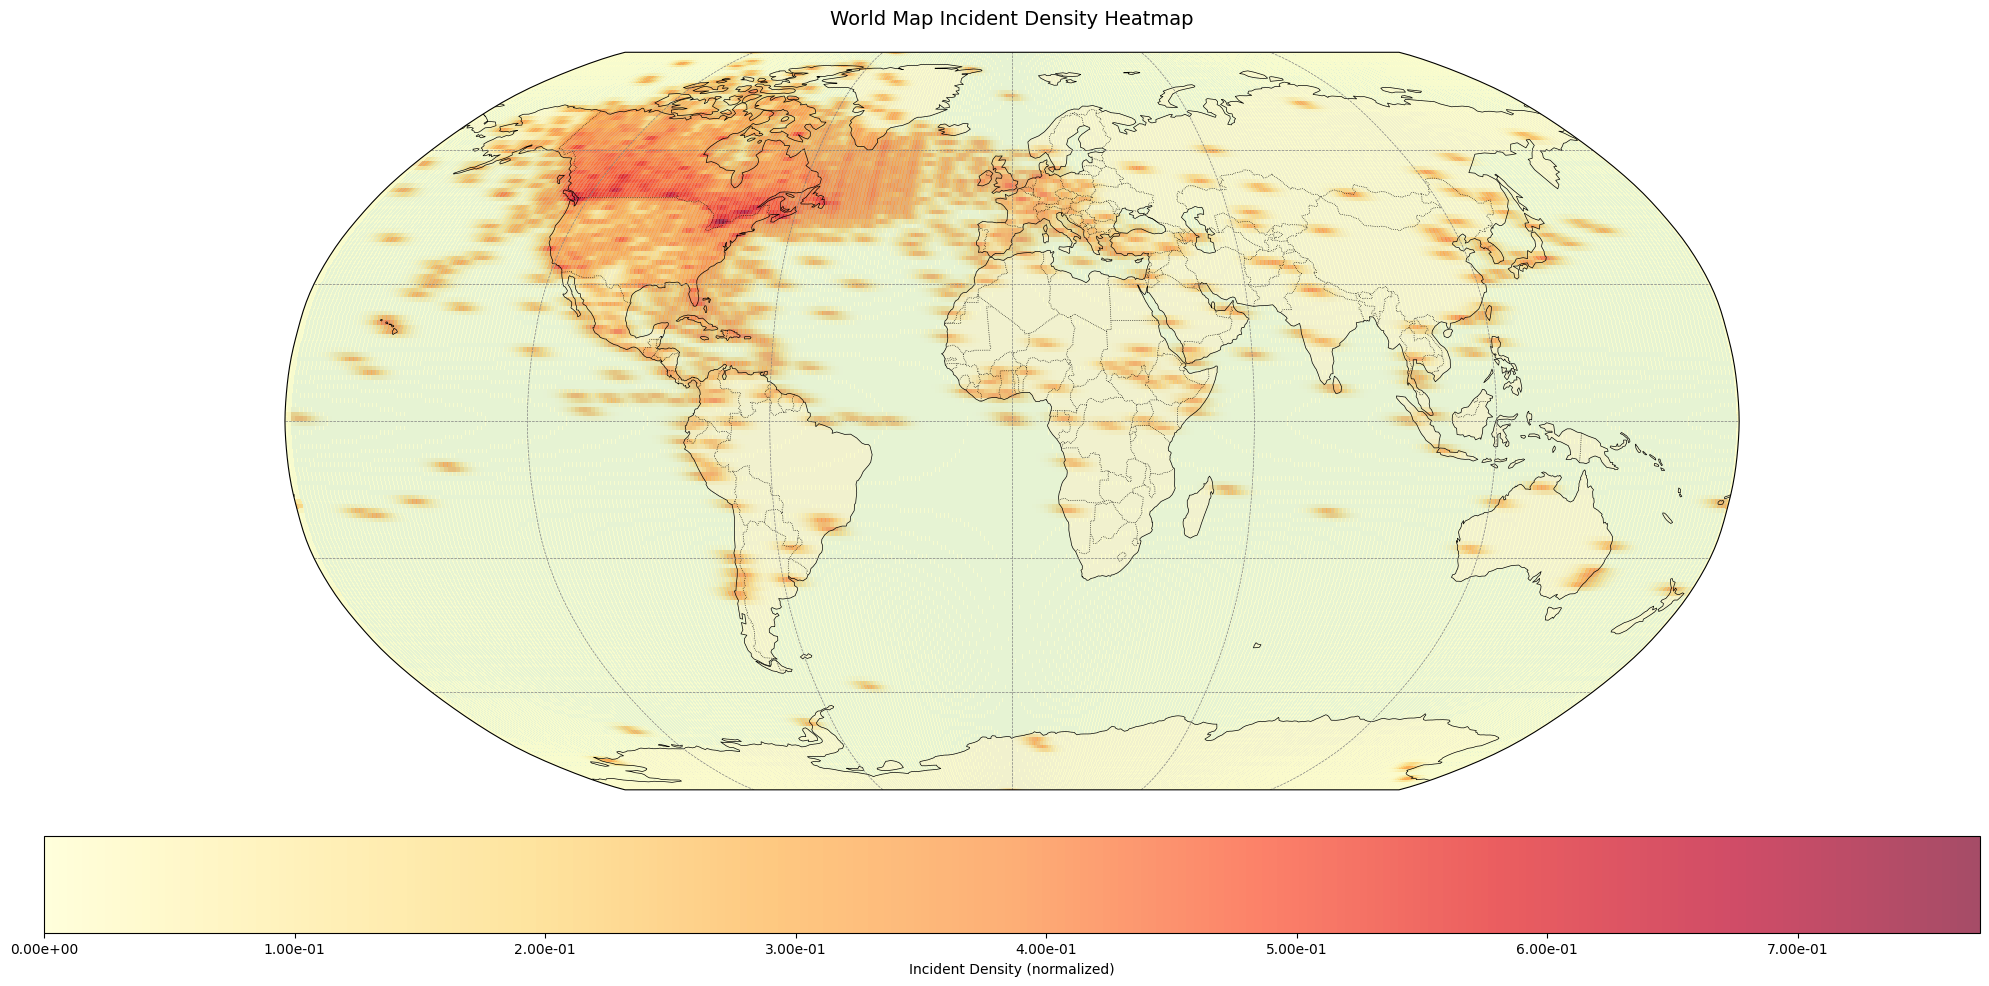

In [19]:
coords = df[['Latitude', 'Longitude']]
coordinates_list = list(zip(coords['Latitude'], coords['Longitude']))
plot_coordinates_heatmap(coordinates_list)

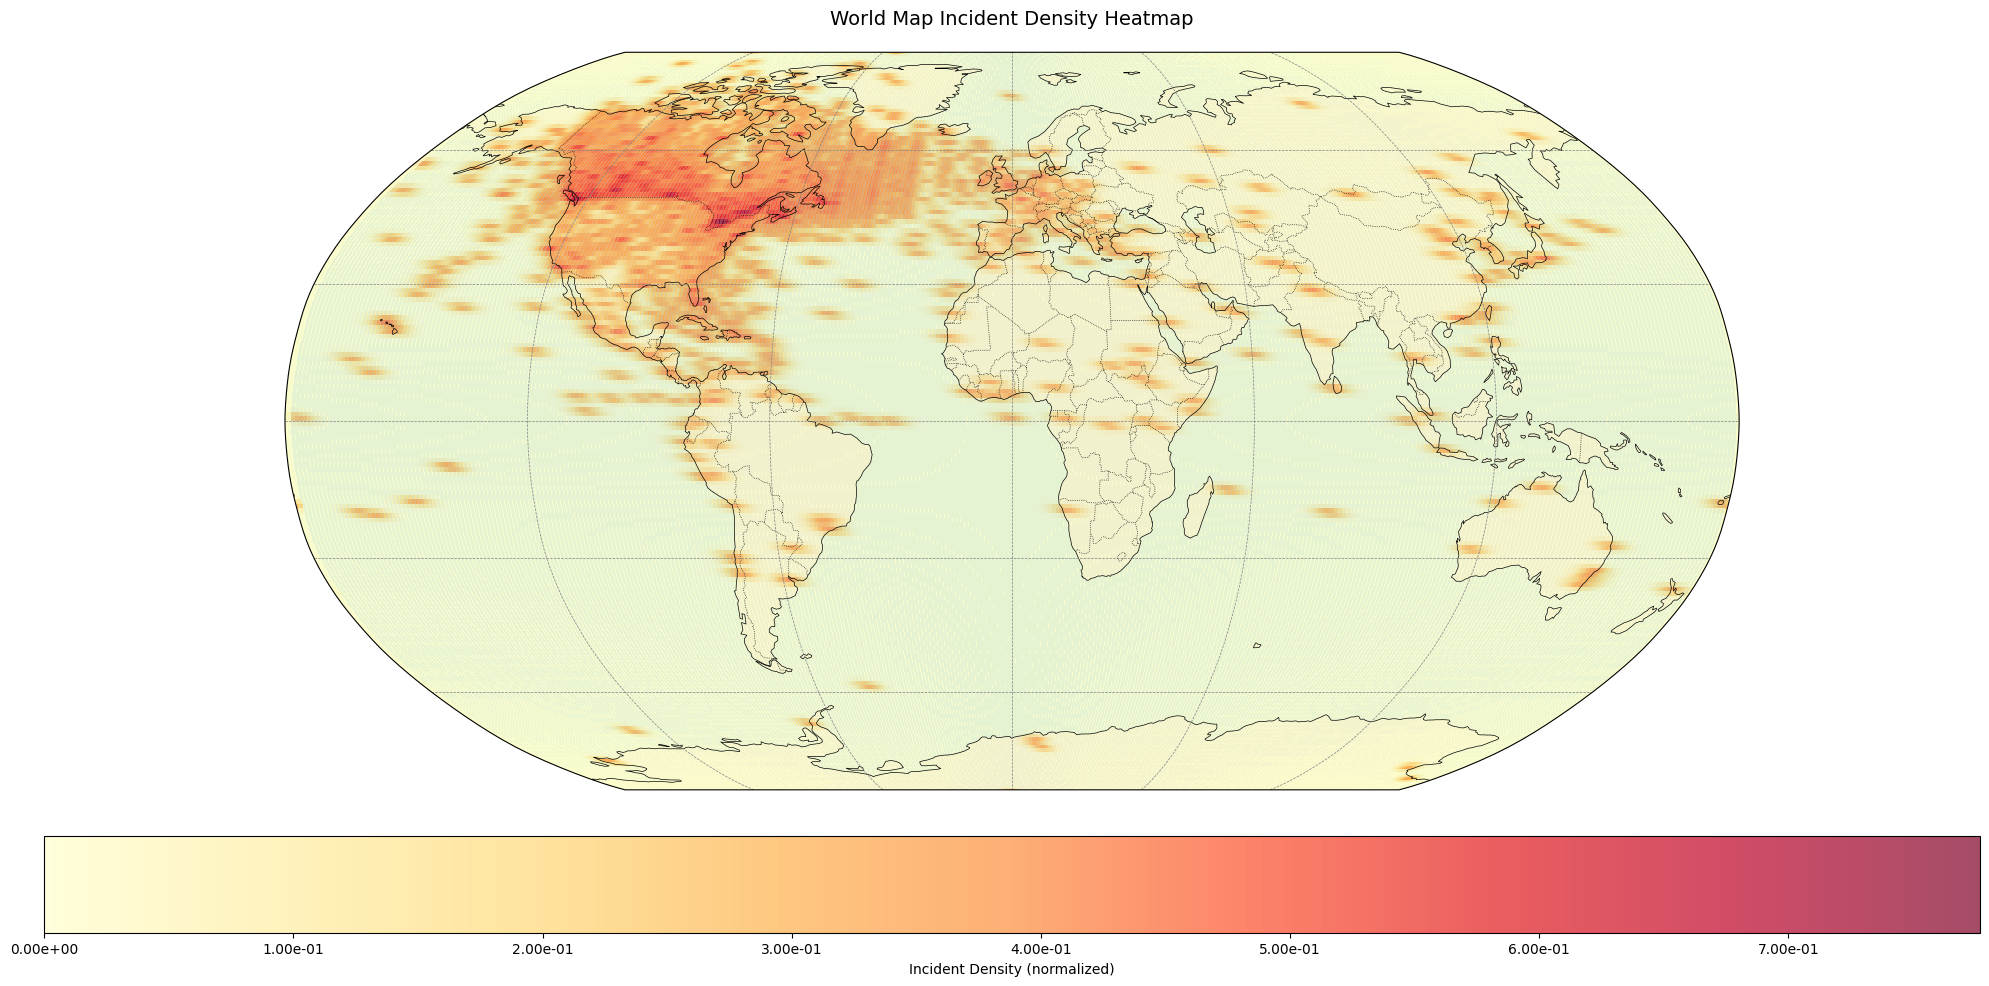

In [20]:
aeroplane_coords = df[df["AircraftTypeID_DisplayEng"] == "AEROPLANE"][["Latitude", "Longitude"]]
aeroplane_coords = list(zip(aeroplane_coords['Latitude'], aeroplane_coords['Longitude']))
plot_coordinates_heatmap(aeroplane_coords)

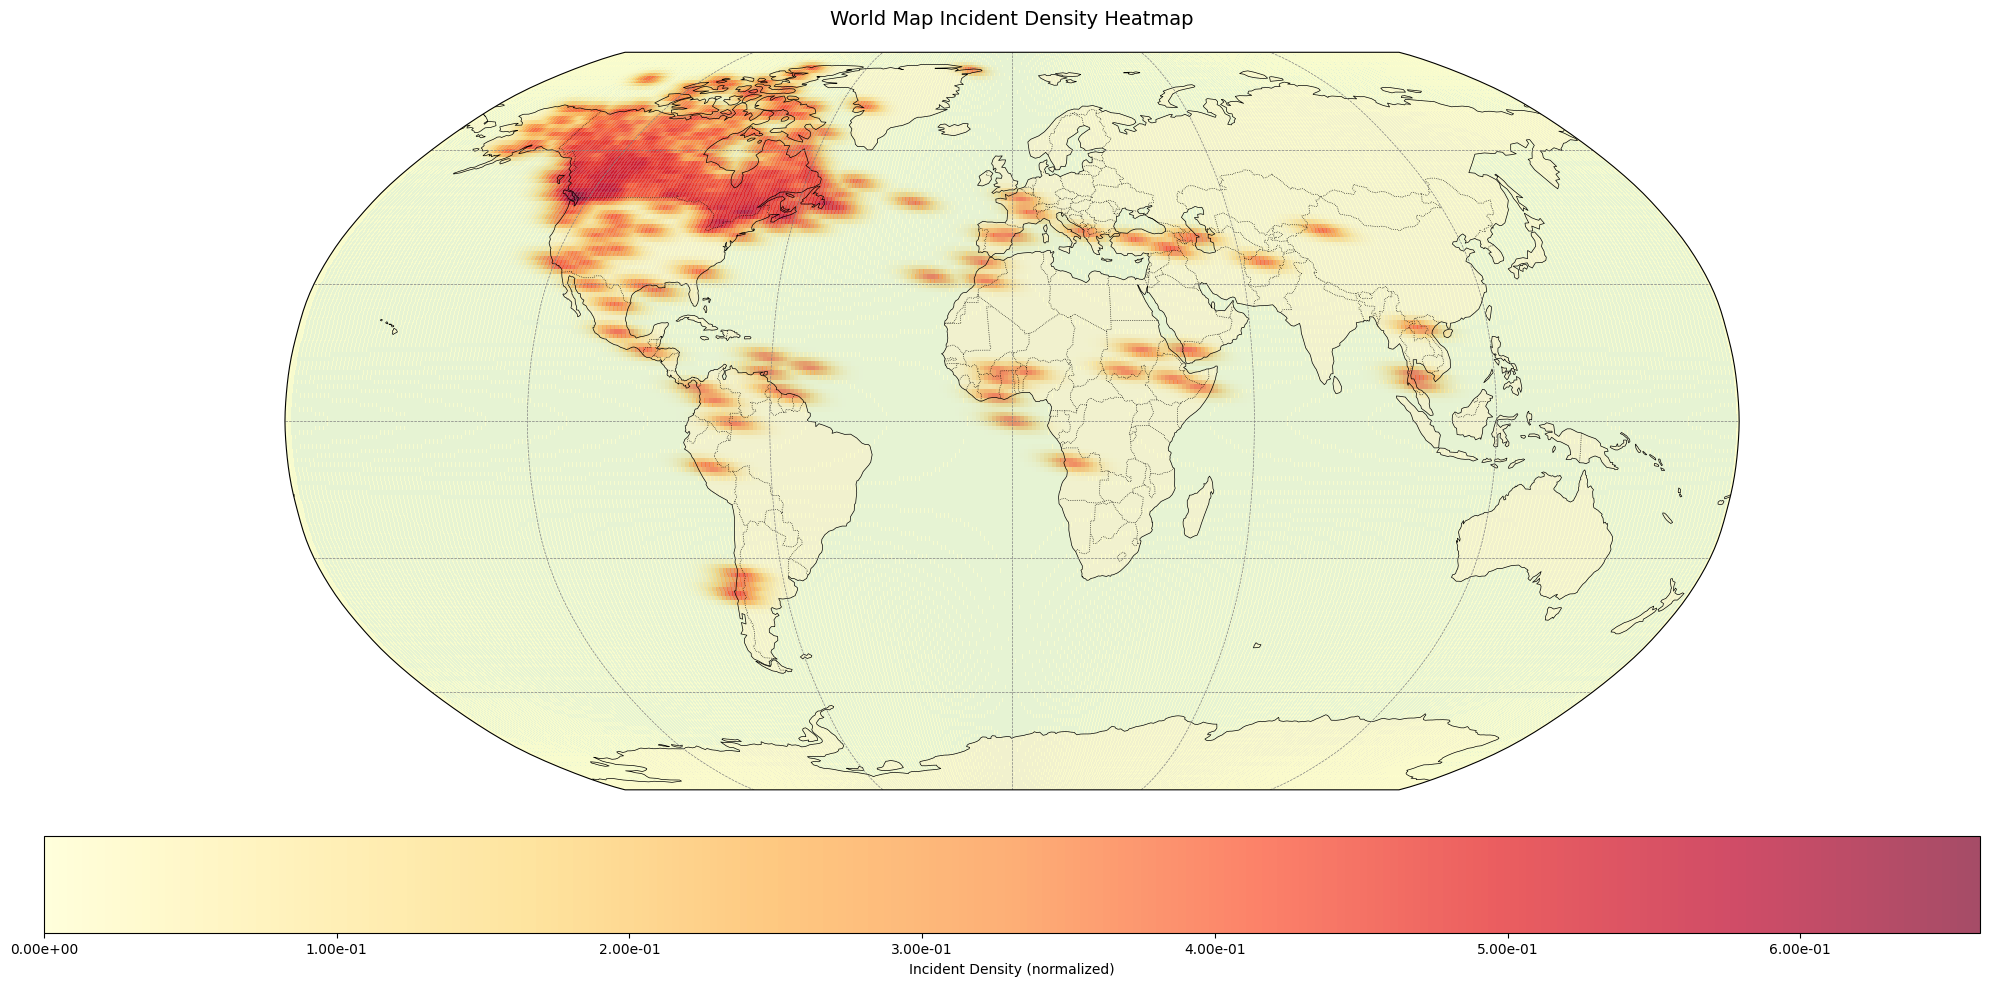

In [27]:
heli_coords = df[df["AircraftTypeID_DisplayEng"] == "HELICOPTER"][["Latitude", "Longitude"]]
heli_coords = list(zip(heli_coords['Latitude'], heli_coords['Longitude']))
plot_coordinates_heatmap(heli_coords)

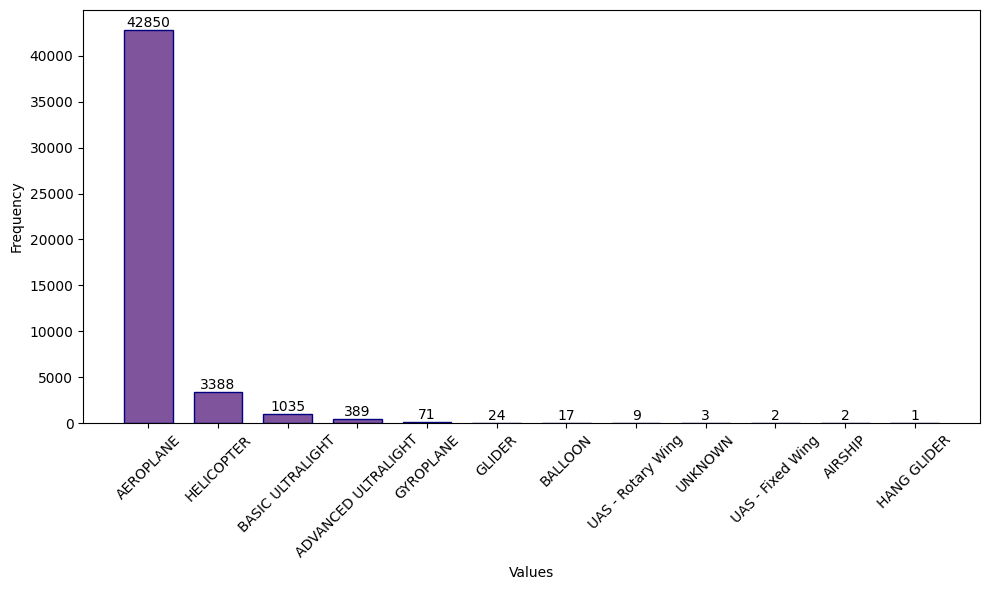

In [42]:
# frequency distributionn of aircraft type
aircraft_type = df['AircraftTypeID_DisplayEng'].dropna()
plot_frequency(aircraft_type, color='#80549c')

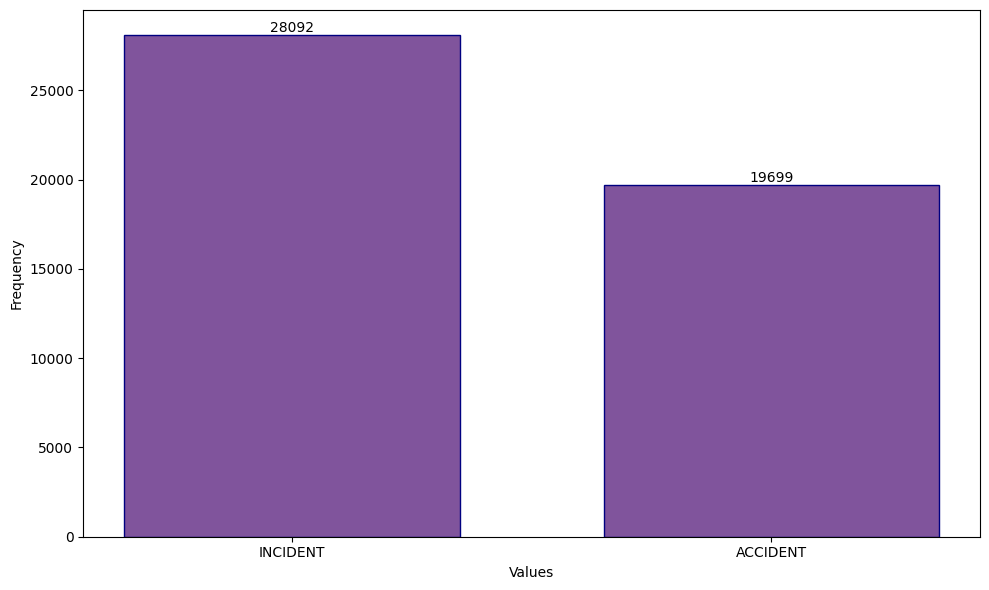

In [43]:
# frequency distributionn of occurence type
occ_type = df['OccTypeID_DisplayEng'].dropna()
plot_frequency(occ_type, rotation=0, color='#80549c')

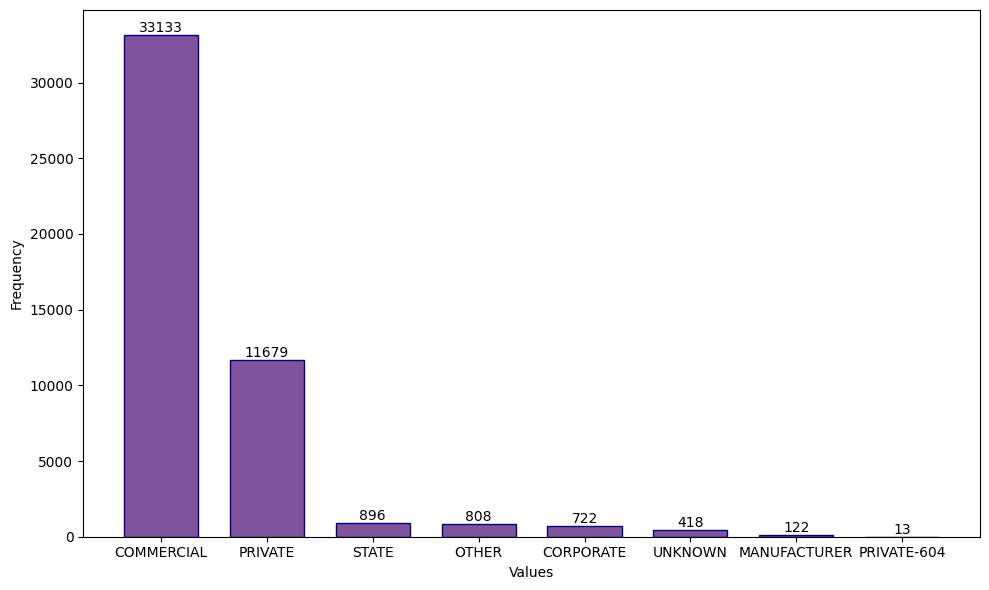

In [41]:
# frequency distributionn of operator type
opp_type = df['OperatorTypeID_DisplayEng'].dropna()
plot_frequency(opp_type, rotation=0, color='#80549c')

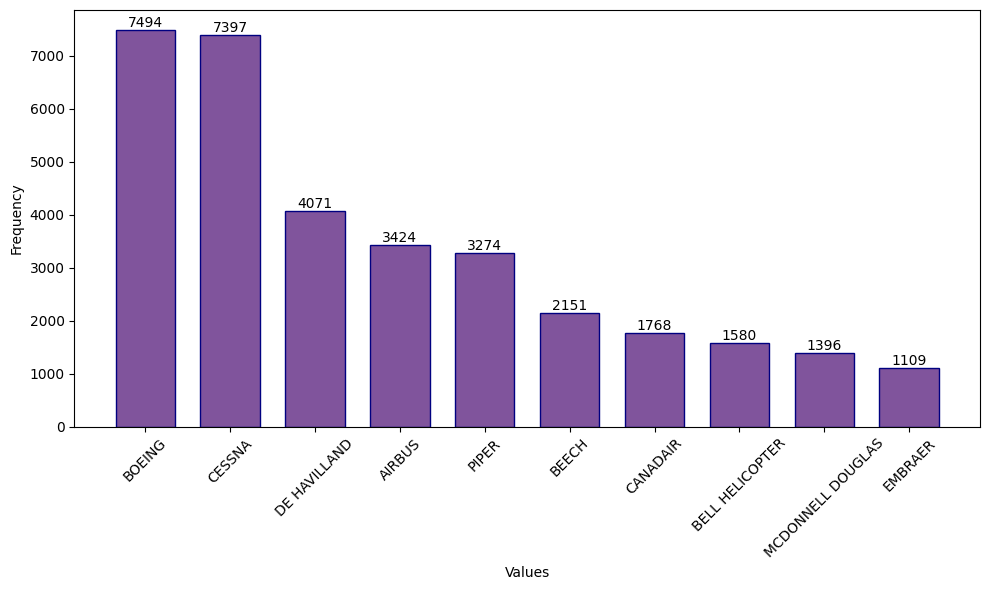

In [46]:
# frequency distributionn of province
make = df['AircraftMakeID_DisplayEng'].dropna()
plot_frequency(make, color='#80549c', limit=10, rotation=45)
# AircraftMakeID_DisplayEng

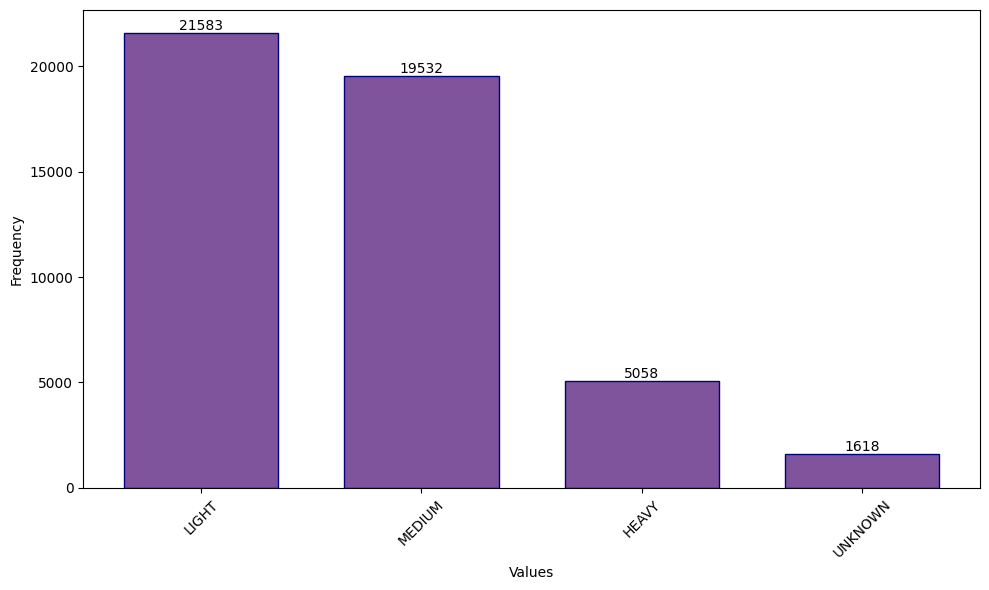

In [50]:
# frequency distributionn of turbulance
turbulence = df['WakeTurbulenceCategoryID_DisplayEng'].dropna()
plot_frequency(turbulence, color='#80549c', rotation=45)